# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.

Names of people you have worked with goes here: Chuqiao Yuan and Rong Liu

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes. The time of the day on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
# read the file
# your code here

dataset_1 = pd.read_csv('data/dataset_1.csv')
dataset_1.head()


,TimeMin,PickupCount
0,860.0,33.0
1,17.0,75.0
2,486.0,13.0
3,300.0,5.0
4,385.0,10.0


In [4]:
# split the data
# your code here
x_train, x_test, y_train, y_test = train_test_split(dataset_1['TimeMin'], dataset_1['PickupCount'], test_size=0.2, random_state=42)


In [5]:
# your code here
train_data = pd.DataFrame(
    {'TimeMin': x_train,
     'PickupCount': y_train
    })

test_data = pd.DataFrame(
    {'TimeMin': x_test,
     'PickupCount': y_test
    })

**1.2 Generate a scatter plot of the training data points**

Text(0.5,1,'Time of Day v.s. Number of Pickups (Training Set)')

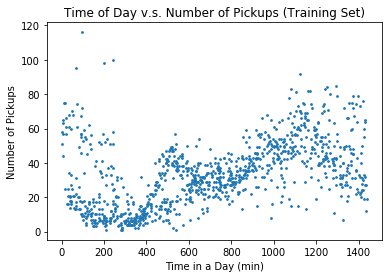

In [6]:
# Your code here
fig, ax = plt.subplots(1,1) # Get figure and axes objects
ax.scatter(train_data['TimeMin'], train_data['PickupCount'], s = 3) # Make a plot
ax.set_xlabel('Time in a Day (min)')
ax.set_ylabel('Number of Pickups')
ax.set_title('Time of Day v.s. Number of Pickups (Training Set)')

**1.3 Discuss your results. Does the pattern of taxi pickups make intuitive sense to you?**

Yes. First, the numbers of pickups are roughly the same at the end of the day and at the beginning of the day, making this a continuous pattern. Second, we see that the number of pickups is the lowest around 3-6:30AM, when people are generally at sleep, and it has two peaks at around 8:30AM and 6:30PM, when people travel between work and home. Moreover, we see that the number of pickups has greatest variation between 10PM and 3AM, maybe because people have very different schedules at night.

<div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ... **

In [7]:
# your code here
ks = [1,10,75,250,500,750,1000]
KNNModels = {}
for k in ks:
    KNNModels[k] = KNeighborsRegressor(n_neighbors=k).fit(train_data['TimeMin'].values.reshape(-1,1), 
                                                          train_data['PickupCount'].values.reshape(-1,1))


**2.2 For each $k$ on the training set, overlay a scatter plot ... **

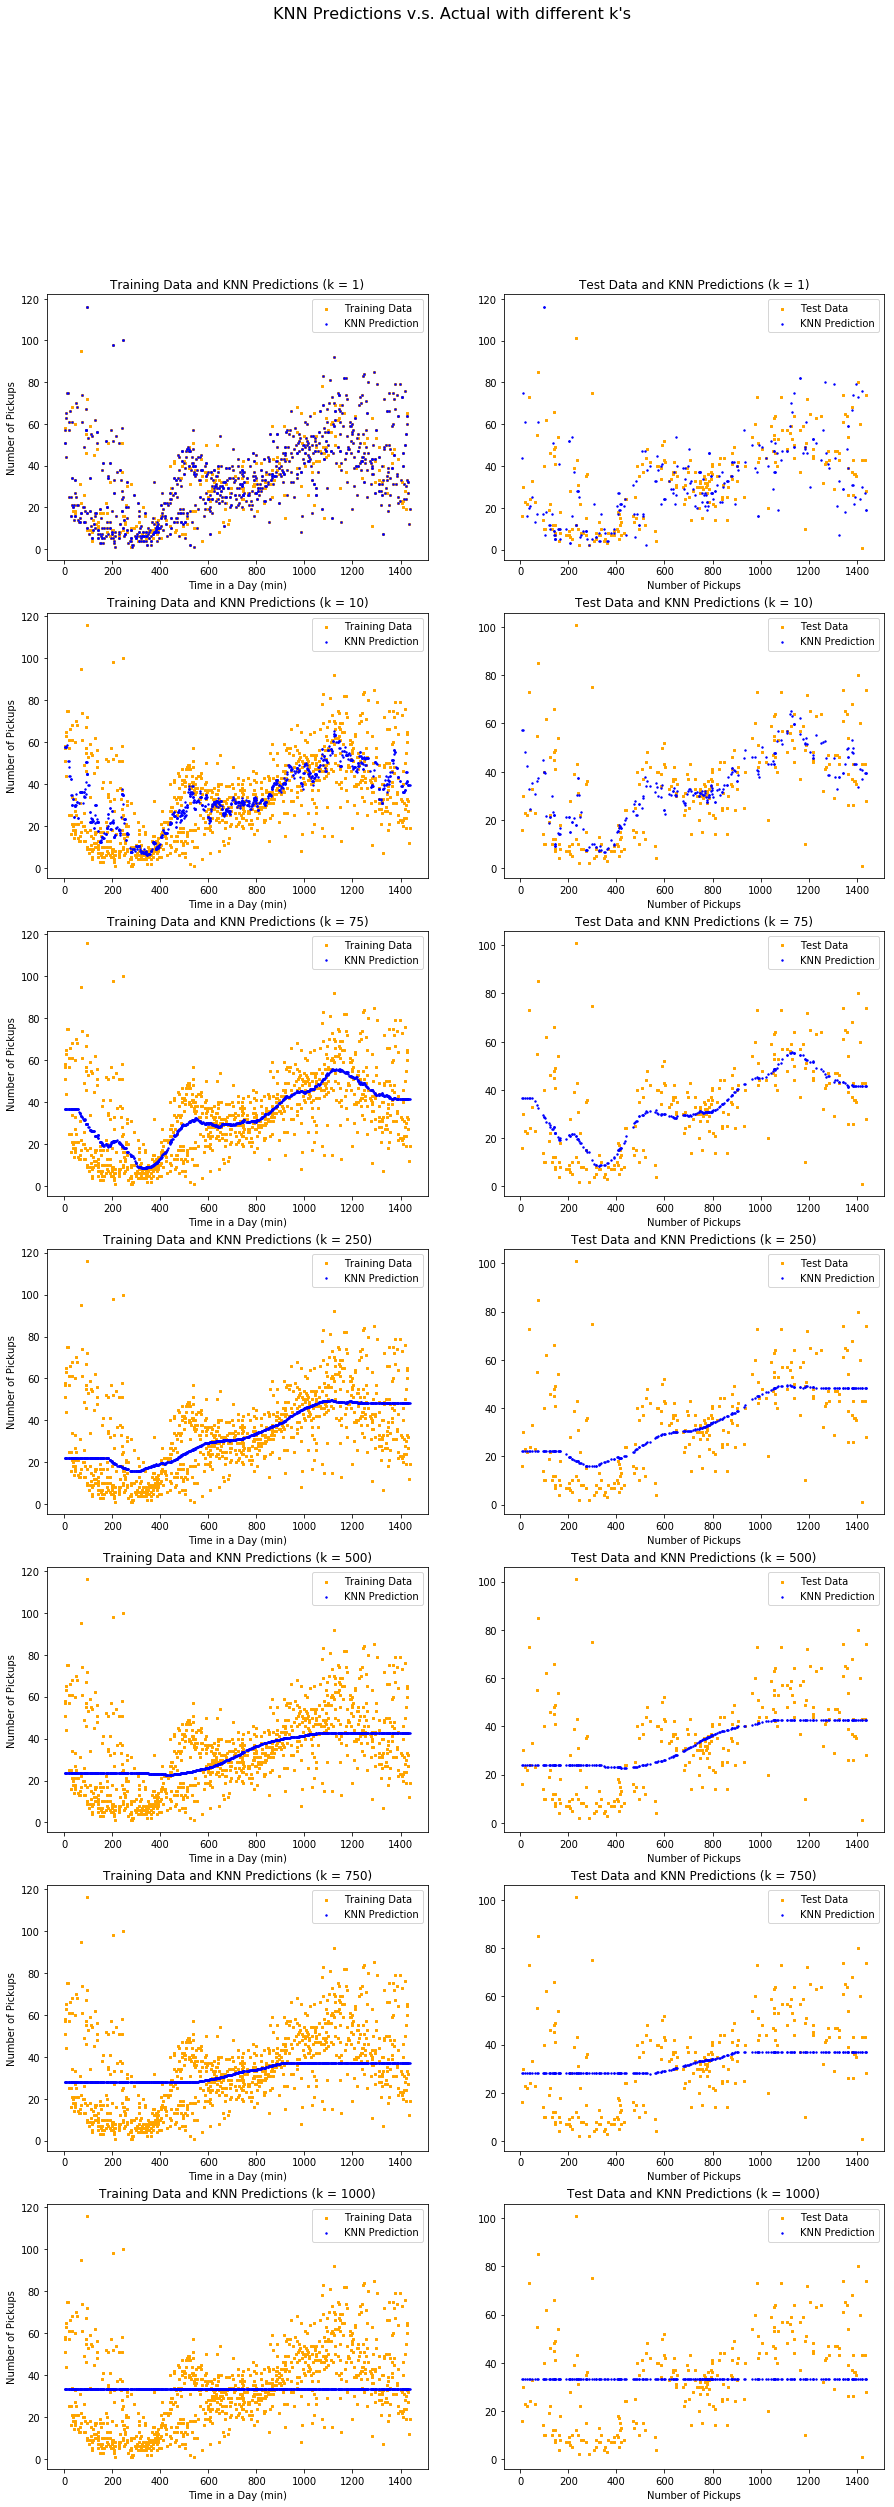

In [8]:
# your code here
fig, ax = plt.subplots(7,2,figsize=[15,40])
fig.suptitle('KNN Predictions v.s. Actual with different k\'s', fontsize=16)

for i in range(7):
    k = ks[i]
    # Plot Training Data and KNN Predictions
    ax[i,0].scatter(train_data['TimeMin'], train_data['PickupCount'], 
                    s=2, c='orange', marker='s', label='Training Data')
    ax[i,0].scatter(train_data['TimeMin'], KNNModels[k].predict(x_train.values.reshape(-1,1)), 
                    s=2, c='blue', marker='o', label='KNN Prediction')
    ax[i,0].set_title('Training Data and KNN Predictions (k = {0})'.format(k))
    ax[i,0].set_xlabel('Time in a Day (min)')
    ax[i,0].set_ylabel('Number of Pickups')
    ax[i,0].legend(loc='upper right')
    # Plot Test Data and KNN Predictions
    ax[i,1].scatter(test_data['TimeMin'], test_data['PickupCount'], 
                    s=2, c='orange', marker='s', label='Test Data')
    ax[i,1].scatter(test_data['TimeMin'], KNNModels[k].predict(x_test.values.reshape(-1,1)), 
                    s=2, c='blue', marker='o', label='KNN Prediction')
    ax[i,1].set_title('Test Data and KNN Predictions (k = {0})'.format(k))
    ax[i,1].set_xlabel('Time in a Day (min)')
    ax[i,1].set_xlabel('Number of Pickups')
    ax[i,1].legend(loc='upper right')

**2.3 Report the $R^2$ score for the fitted models ... **

In [9]:
R2_KNN_train = []
R2_KNN_test = []

for k in ks:
    R2_KNN_train.append(r2_score(y_train, KNNModels[k].predict(x_train.values.reshape(-1,1))))
    R2_KNN_test.append(r2_score(y_test, KNNModels[k].predict(x_test.values.reshape(-1,1))))

R2_df = pd.DataFrame(
    {'R-Squared of KNN on Training Data': R2_KNN_train,
     'R-Squared of KNN on Test Data': R2_KNN_test
    })

R2_df.index = ['k=1','k=10','k=75','k=250','k=500','k=750','k=1000']

R2_df

,R-Squared of KNN on Training Data,R-Squared of KNN on Test Data
k=1,0.712336,-0.418932
k=10,0.509825,0.272068
k=75,0.445392,0.390310
k=250,0.355314,0.340341
k=500,0.290327,0.270321
k=750,0.179434,0.164909
k=1000,0.000000,-0.000384


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

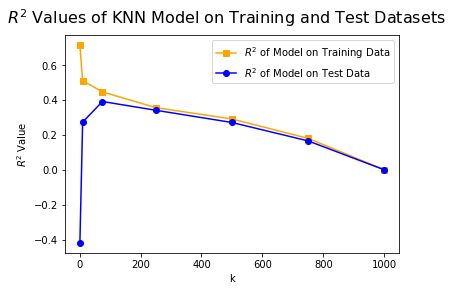

In [10]:
# your code here
fig, ax = plt.subplots(1,1)
fig.suptitle('$R^2$ Values of KNN Model on Training and Test Datasets', fontsize=16)

ax.plot(ks, R2_KNN_train, c='orange', marker='s', label='$R^2$ of Model on Training Data')
ax.plot(ks, R2_KNN_test, c='blue', marker='o', label='$R^2$ of Model on Test Data')
#ax.set_title('Training Data and KNN Predictions (k = {0})'.format(k))
ax.set_xlabel('k')
ax.set_ylabel('$R^2$ Value')
ax.legend(loc='upper right')

**2.5 Discuss the results**


**1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?**

It is the same as using the mean to predict. When $k = n$, the model essentially takes all data points as the nearest neighbors. 


**2. What does an $R^2$ score of $0$ mean?**

It means our current model is predicting the outcomes as well as using the mean to predict.


**3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?**

It means our current model is predicting worse outcomes than using the mean to predict. The 1NN model generated a negative $R^2$ score when it was applied to the Test Dataset.

**4. Do the training and test $R^2$ plots exhibit different trends?  Describe.**

The trends are different when k is small and are similar when k is large. 

Because the KNN model was constructed based on the Training Set, when k is very small, it has the danger to overfit. We observe that when $k = 1$, the $R^2$ score is very high for the Training set and very low (negative) for the test set. However, when k = 75, the $R^2$ values become very similar, and the model is the best one for the test set. As k increases to 1000, both $R^2$ values gradually decrease to 0. This is because as k increases, the KNN becomes more and more similar to the model using mean to perdict.

**5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?**

When k is too small, the model is overfitting. The resulting $R^2$ value is high for the training set but negative for the test set. When k is too large, the model fails to represent the relationship between the feature and the outcome. The resulting $R^2$ values approach zero for both training and test sets. We need to use an optimal k in order to generate the best model.

**6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?**

Among the 7 given k values, k = 10 is the best one. The corresponding training set $R^2$ value is 0.445392, and the corresponding test set $R^2$ value is 0.390310.



<div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.
6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ... **

In [11]:
# your code here
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
OLSModel = OLS(y_train, X_train)

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ... **

In [12]:
# your code here
# fit
results_ols = OLSModel.fit()
# pull the beta parameters out from results_ols
beta0 = results_ols.params[0]
beta1 = results_ols.params[1]

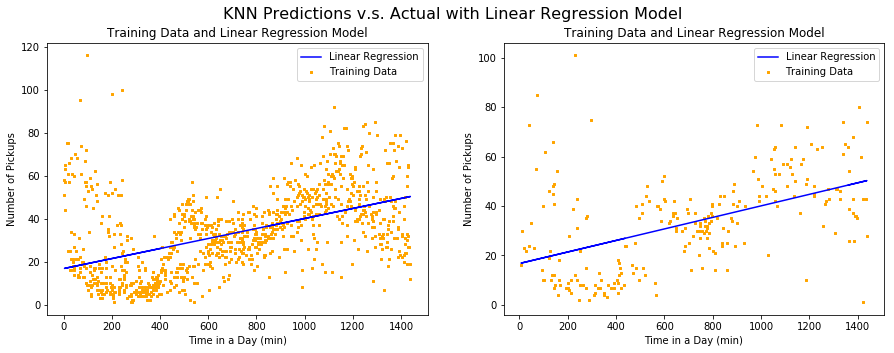

In [13]:
# your code here 
fig, ax = plt.subplots(1,2,figsize=[15,5])
fig.suptitle('KNN Predictions v.s. Actual with Linear Regression Model', fontsize=16)

ax[0].scatter(x_train, y_train, s=2, c='orange', marker='s', label='Training Data')
ax[0].plot(x_train, results_ols.predict(X_train), c='blue', label='Linear Regression')
ax[0].set_title('Training Data and Linear Regression Model')
ax[0].set_xlabel('Time in a Day (min)')
ax[0].set_ylabel('Number of Pickups')
ax[0].legend(loc='upper right')


ax[1].scatter(x_test, y_test, s=2, c='orange', marker='s', label='Training Data')
ax[1].plot(x_test, results_ols.predict(X_test), c='blue', label='Linear Regression')
ax[1].set_title('Training Data and Linear Regression Model')
ax[1].set_xlabel('Time in a Day (min)')
ax[1].set_ylabel('Number of Pickups')
ax[1].legend(loc='upper right')

**3.3 Report the $R^2$ score for the fitted model on both the training and test sets. **

In [14]:
# your code here
R2_LR_train = r2_score(y_train, results_ols.predict(X_train))
R2_LR_test = r2_score(y_test, results_ols.predict(X_test))
print("The R-squared value for the train set is {0:8.6f}.\nThe R-squared value for the test set is {1:8.6f}.".format(R2_LR_train, R2_LR_test))

The R-squared value for the train set is 0.243026.
The R-squared value for the test set is 0.240662.


**3.4 Report the slope and intercept values for the fitted linear model.  **

In [15]:
## show summary
# your code here
results_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            PickupCount   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Wed, 26 Sep 2018   Prob (F-statistic):           2.34e-62
Time:                        10:49:58   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# your code here
print("The regression coefficients are: intercept = {0:8.6f} and slope = {1:8.6f}.".format(beta0, beta1))

The regression coefficients are: intercept = 16.750601 and slope = 0.023335.


**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [17]:
# your code here
results_ols.conf_int(alpha = 0.05)

,0,1
const,14.675141,18.826062
TimeMin,0.020777,0.025893


**3.6 Create a scatter plot of the residuals**

In [18]:
# your code here
res_LR = y_test - (results_ols.predict(X_test))

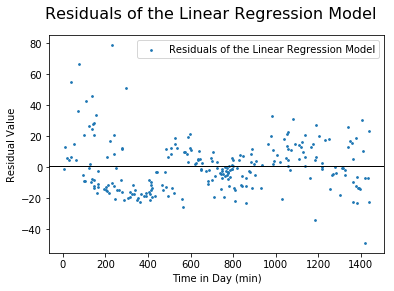

In [19]:
# your code here
fig, ax = plt.subplots(1,1)
fig.suptitle('Residuals of the Linear Regression Model', fontsize=16)
ax.axhline(0.5,c='black',lw=1)
ax.scatter(x_test, res_LR, s=3, label='Residuals of the Linear Regression Model')
ax.set_xlabel('Time in Day (min)')
ax.set_ylabel('Residual Value')
ax.legend(loc='upper right')

**3.7 Discuss the results:**

**1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?**

The test $R^2$ score is less than the best test $R^2$ value obtained with k-NN regression, meaning that k-NN provides a better prediction.

**2. What does the sign of the slope of the fitted linear model convey about the data?  **

The positive slope indicates that the number of pickups increase as it gets later in a day.

**3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?**  
Yes, since for intercept, $14.675141<16.750601<18.826062$, and for slope, $0.020777<0.023335<0.025893$.


**4. Do you expect $99\%$ confidence intervals for the slope and intercept to be tighter or wider than the $95\%$ confidence intervals? Briefly explain your answer.**  

I expect it to be tighter. $99\%$ confidence interval is the range of values such that the true value is contained in this interval with 99% probability. We need to decrease the interval in order to be more confident.

**5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.**

We see a trend in the residuals plot, so the assumption of linearity is not valid for this data.

**6. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the linearity assumption?**

I would like to add the restrictions that $\hat{y}(0) = \hat{y}(1440)$ and $\hat{y}'(0) = \hat{y}'(1440)$.

It basically rejects the linearity assumption. Otherwise, if we insist on the linearity assumption, the model will have slope = 0, and the $R^2$ value would be zero. 


<div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


<div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the 3 outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots: the first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?



**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Alter the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order of 'severity').  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step?
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
    
**4.8**. Run your algorithm in 4.7 on the training set data.  
1. What outliers does it identify?
2. How do those outliers compare to the outliers you found in 4.4?
3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data? ** 

In [20]:
# read the data
# your code here
dataset_outlier_train = pd.read_csv('data/outliers_train.csv')
dataset_outlier_test = pd.read_csv('data/outliers_test.csv')
#dataset_outlier_train.head()
#dataset_outlier_test.head()
dataset_outlier_train.shape

(53, 2)

Text(0,0.5,'Y')

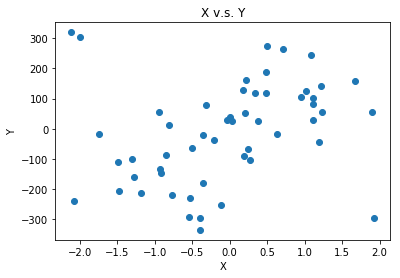

In [21]:
# scatter plot
# your code here
plt.scatter(dataset_outlier_train['X'],dataset_outlier_train['Y'])
plt.title('X v.s. Y')
plt.xlabel('X')
plt.ylabel('Y')

There seem to exist three outliers at around (2,-300) and (-2,300).


**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ... **

In [22]:
# your code here
outlier_x_train = dataset_outlier_train['X']
outlier_y_train = dataset_outlier_train['Y']
outlier_x_test = dataset_outlier_test['X']
outlier_y_test = dataset_outlier_test['Y']
OutlierOLSModel = OLS(outlier_y_train, sm.add_constant(outlier_x_train))
results_outlier = OutlierOLSModel.fit()
#beta0_outlier = results_outlier.params[0]
#beta1_outlier = results_outlier.params[1]

**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

In [23]:
import scipy
scipy.misc.comb(53,3)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `comb` is deprecated!
Importing `comb` from scipy.misc is deprecated in scipy 1.0.0. Use `scipy.special.comb` instead.
  


23426.0

We need to calculate 53C3 = 23426 times.


**4.4 CS109 hack ... **

In [24]:
def find_outliers_simple(dataset_x, dataset_y):
    # your code here
    outlier_indices = []
    OLSModel = OLS(dataset_y, dataset_x)
    residuals = abs(OLSModel.fit().resid)
    
    for n in range(3):
        i = np.argmax(residuals)
        outlier_indices.append(i)
        residuals[i] = 0
    
    return outlier_indices

In [25]:
# get outliers
# your code here
dataset_x = outlier_x_train.values.reshape(-1,1)
dataset_y = outlier_y_train.values.reshape(-1,1)
outlier_indices = find_outliers_simple(dataset_x, dataset_y)

In [26]:
# remove outliers
outliers_x = outlier_x_train[outlier_indices]
outliers_y = outlier_y_train[outlier_indices]

outlier_x_train2 = outlier_x_train.drop(outlier_indices)
outlier_y_train2 = outlier_y_train.drop(outlier_indices)

In [27]:
# calculate outlier model
# your code here
OutlierFreeSimpleModel = OLS(outlier_y_train2, sm.add_constant(outlier_x_train2))
results_outlier_free = OutlierFreeSimpleModel.fit()
#beta0_outlier_free = results_outlier_free.params[0]
#beta1_outlier_free = results_outlier_free.params[1]

**4.5 Create a figure with two subplots: the first is a scatterplot ... **

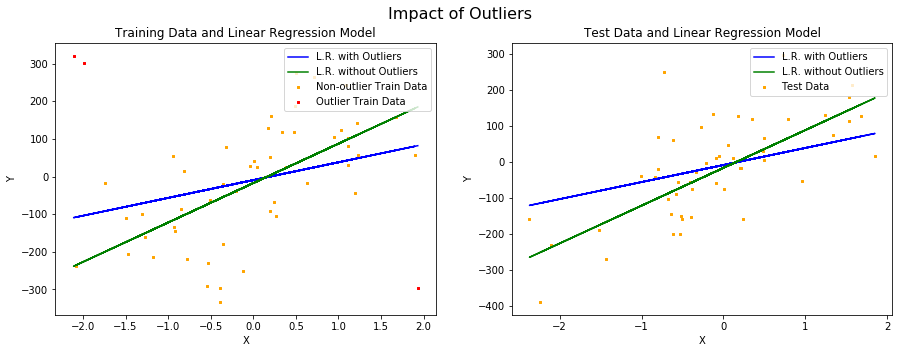

In [28]:
# plot 
# your code here
fig, ax = plt.subplots(1,2,figsize=[15,5])
fig.suptitle('Impact of Outliers', fontsize=16)

ax[0].scatter(outlier_x_train2, outlier_y_train2, s=3, c='orange', marker='s', label='Non-outlier Train Data')
ax[0].scatter(outliers_x, outliers_y, s=3, c='red', marker='s', label='Outlier Train Data')
ax[0].plot(outlier_x_train, results_outlier.predict(sm.add_constant(outlier_x_train)), c='blue', label='L.R. with Outliers')
ax[0].plot(outlier_x_train, results_outlier_free.predict(sm.add_constant(outlier_x_train)), c='green', label='L.R. without Outliers')

ax[0].set_title('Training Data and Linear Regression Model')
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].legend(loc='upper right')

ax[1].scatter(outlier_x_test, outlier_y_test, s=3, c='orange', marker='s', label='Test Data')
ax[1].plot(outlier_x_test, results_outlier.predict(sm.add_constant(outlier_x_test)), c='blue', label='L.R. with Outliers')
ax[1].plot(outlier_x_test, results_outlier_free.predict(sm.add_constant(outlier_x_test)), c='green', label='L.R. without Outliers')

ax[1].set_title('Test Data and Linear Regression Model')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend(loc='upper right')


Visually, the outlier-free model fits the test data more closely.

**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [29]:
# your code here
R2_LR_outlier = r2_score(outlier_y_test, results_outlier.predict(sm.add_constant(outlier_x_test)))
R2_LR_outlierfree = r2_score(outlier_y_test, results_outlier_free.predict(sm.add_constant(outlier_x_test)))
print("The R-squared value for OutlierOLSModel is {0:8.6f}.\nThe R-squared value for the OutlierFreeSimpleModel is {1:8.6f}.".format(R2_LR_outlier, R2_LR_outlierfree))
print("Therefore, the OutlierFreeSimpleModel produces a better R-squared score.")

The R-squared value for OutlierOLSModel is 0.340857.
The R-squared value for the OutlierFreeSimpleModel is 0.452957.
Therefore, the OutlierFreeSimpleModel produces a better R-squared score.


**4.7 One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers. **

In [30]:
# your code here
def find_outliers_general(dataset_x, dataset_y):
    outlier_indices = []
    OLSModel = OLS(dataset_y, dataset_x)
    residuals = abs(OLSModel.fit().resid)
    
    for i in range(len(residuals)):
        if (residuals[i] >= np.mean(residuals) + 1.5 * np.std(residuals)):
            outlier_indices.append(i)
            
    return outlier_indices

**4.8 Run your algorithm in 4.7 on the training set data **

In [31]:
# your code here
outlier_indices_general = find_outliers_general(dataset_x, dataset_y)
print(np.column_stack((outlier_x_train, outlier_y_train))[outlier_indices_general])

[[  -0.39403433 -334.85935686]
 [  -0.39166775 -295.87863651]
 [  -2.11        320.        ]
 [  -1.991       303.        ]
 [   1.931      -297.        ]]


In [32]:
# your code here
outlier_x_train3 = outlier_x_train.drop(outlier_indices_general)
outlier_y_train3 = outlier_y_train.drop(outlier_indices_general)

OutlierFreeGeneralModel = OLS(outlier_y_train3, sm.add_constant(outlier_x_train3))
results_outlier_free_g = OutlierFreeGeneralModel.fit()
#beta0_outlier_free_g = results_outlier_free_g.params[0]
#beta1_outlier_free_g = results_outlier_free_g.params[1]

In [33]:
# your code here
R2_outlier_simple = r2_score(outlier_y_test, results_outlier_free.predict(sm.add_constant(outlier_x_test)))
R2_outlier_general = r2_score(outlier_y_test, results_outlier_free_g.predict(sm.add_constant(outlier_x_test)))
print("The R-squared value for the simple outlier is {0:8.6f}.\nThe R-squared value for the general outlier is {1:8.6f}.".format(R2_outlier_simple, R2_outlier_general))

The R-squared value for the simple outlier is 0.452957.
The R-squared value for the general outlier is 0.462538.


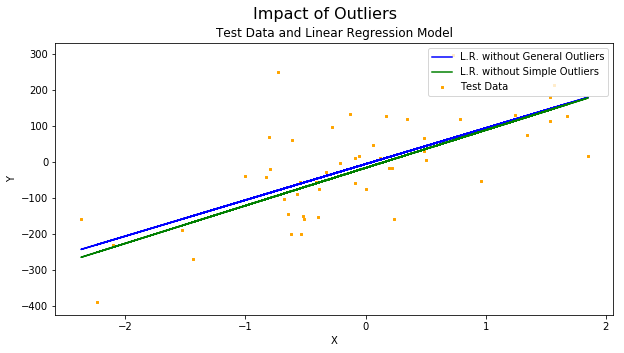

In [34]:
# your code here
fig, ax = plt.subplots(1,1,figsize=[10,5])
fig.suptitle('Impact of Outliers', fontsize=16)

ax.scatter(outlier_x_test, outlier_y_test, s=3, c='orange', marker='s', label='Test Data')
ax.plot(outlier_x_test, results_outlier_free_g.predict(sm.add_constant(outlier_x_test)), c='blue', label='L.R. without General Outliers')
ax.plot(outlier_x_test, results_outlier_free.predict(sm.add_constant(outlier_x_test)), c='green', label='L.R. without Simple Outliers')

ax.set_title('Test Data and Linear Regression Model')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend(loc='upper right')

** 1. What outliers does it identify? **

It identifies five outliers:(-0.39403433, -334.85935686), (-0.39166775, -295.87863651), (-2.11, 320), (-1.991, 303), and (1.931, -297).

** 2. How do those outliers compare to the outliers you found in 4.4? **

It finds two new outliers:(-0.39403433, -334.85935686) and (-0.39166775, -295.87863651).

** 3. How does the general outlier-free Linear Regression model you created in 4.7 perform compared to the simple one in 4.4? **

Because the new algorithm only removed two more less significant outliers, the resulting linear regression model is very similar to the old one. The $R^2$ value of the new model is slightly higher, meaning that the new model is a better modeling of the distribution.